# WeatherPy
## Melvin Garcia

In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
from citipy import citipy
import requests as req
import pandas as pd
import numpy as np
import seaborn
import random
import apikeys
import json

## Generate Cities List

In [3]:
# Create random set 2000 latitude and longitude values
# The large random size will allow more choices to choose from and prevent .nearest_city 
# from choosing the same city twice

randlon = np.random.uniform(low=-180, high=181, size=2000).tolist()
randlat = np.random.uniform(low=-90, high=91, size=2000).tolist()

In [4]:
# Create list of city names to perform requests on

cities = []

for lat, lon in zip(randlat, randlon):
    city = citipy.nearest_city(lat, lon)
    if city not in cities:
        cities.append(city.city_name)
    else:
        city = citipy.nearest_city(lat, lon)
        cities.append(city.city_name)

In [5]:
# Check that you have at least 500 unique city names to perform requests on
len(set(cities))

759

In [6]:
cities_unique = list(set(cities))

## Perform API Calls

In [7]:
# Loop through the cities list and perform a request for data on each

url = "http://api.openweathermap.org/data/2.5/weather"

params = {'appid': apikeys.OWM_key,
          'q': '',
          'units': 'imperial'}

weather_data = {'City': [],
               'Cloudiness': [],
               'Country': [],
               'Date': [],
               'Humidity': [],
               'Lat': [],
               'Lng':[],
               'Max_Temp':[],
               'Wind Speed':[]}

city_count = 1
city_count_final = 501

print('Beginning Data Retrieval')
print(print('-----------------------------'))

for city in cities_unique:
    try:
    # Get weather data
        params['q'] = city
        response = req.get(url, params=params).json()
    # Get weather params for df for at least 500 cities
        if city_count == city_count_final:
            print('-----------------------------')
            print('Data Retrieval Complete')
            print('-----------------------------')
            break
        elif city not in weather_data['City']:  
            # Construct weather_data dictionary
            weather_data['City'].append(response['name'])
            weather_data['Cloudiness'].append(response['clouds']['all'])
            weather_data['Country'].append(response['sys']['country'])
            weather_data['Date'].append(response['dt'])
            weather_data['Humidity'].append(response['main']['humidity'])
            weather_data['Lat'].append(response['coord']['lat'])
            weather_data['Lng'].append(response['coord']['lon'])
            weather_data['Max_Temp'].append(response['main']['temp_max'])
            weather_data['Wind Speed'].append(response['wind']['speed'])
            print(f'Processing Record {city_count} of 500 | {city}')
            print(f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q={city.replace(" ", "%20")}')
            city_count += 1
        elif city in weather_data['City']:
            continue
    except KeyError:
        print(f'{city} not found. Skipping...')

Beginning Data Retrieval
-----------------------------
None
Processing Record 1 of 500 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=bubaque
Processing Record 2 of 500 | nyimba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=nyimba
Processing Record 3 of 500 | bundaberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=bundaberg
Processing Record 4 of 500 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=flin%20flon
Processing Record 5 of 500 | hay river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=hay%20river
tsentralnyy not found. Skipping...
Processing Record 6 of 500 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=puerto

Processing Record 54 of 500 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=butaritari
Processing Record 55 of 500 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=buala
Processing Record 56 of 500 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=quatre%20cocos
Processing Record 57 of 500 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=ambilobe
Processing Record 58 of 500 | puerto palomas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=puerto%20palomas
Processing Record 59 of 500 | modra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=modra
Processing Record 60 of 500 | kuldiga
http://api.openweathermap.org/data/2.5/w

Processing Record 107 of 500 | amga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=amga
Processing Record 108 of 500 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=cabo%20san%20lucas
bargal not found. Skipping...
Processing Record 109 of 500 | itacare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=itacare
yanan not found. Skipping...
sentyabrskiy not found. Skipping...
Processing Record 110 of 500 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=lebu
Processing Record 111 of 500 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=yellowknife
Processing Record 112 of 500 | mathathane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba4

ye not found. Skipping...
Processing Record 159 of 500 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=new%20norfolk
Processing Record 160 of 500 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=vestmannaeyjar
Processing Record 161 of 500 | lexington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=lexington
Processing Record 162 of 500 | dvinskoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=dvinskoy
Processing Record 163 of 500 | barguzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=barguzin
Processing Record 164 of 500 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=polyarnyy
Processing Record 165 of 500 | lavrent

Processing Record 212 of 500 | tlaltenango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=tlaltenango
Processing Record 213 of 500 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=flinders
keshan not found. Skipping...
Processing Record 214 of 500 | ocampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=ocampo
Processing Record 215 of 500 | villazon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=villazon
Processing Record 216 of 500 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=port%20elizabeth
Processing Record 217 of 500 | paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=paita
Processing Record 218 of 500 | amahai
http://api

Processing Record 264 of 500 | umm lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=umm%20lajj
Processing Record 265 of 500 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=tuktoyaktuk
bacuit not found. Skipping...
Processing Record 266 of 500 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=harper
Processing Record 267 of 500 | poshtove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=poshtove
Processing Record 268 of 500 | batticaloa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=batticaloa
Processing Record 269 of 500 | lukulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=lukulu
Processing Record 270 of 500 | beringovskiy
http://api

Processing Record 317 of 500 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=kamenka
Processing Record 318 of 500 | shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=shelburne
Processing Record 319 of 500 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=meulaboh
Processing Record 320 of 500 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=vao
Processing Record 321 of 500 | mbengwi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=mbengwi
Processing Record 322 of 500 | aracruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=aracruz
Processing Record 323 of 500 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 370 of 500 | nosy varika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=nosy%20varika
Processing Record 371 of 500 | jalpaiguri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=jalpaiguri
olafsvik not found. Skipping...
Processing Record 372 of 500 | thohoyandou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=thohoyandou
Processing Record 373 of 500 | nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=nuuk
Processing Record 374 of 500 | hurricane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=hurricane
Processing Record 375 of 500 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=port%20hardy
Processing Record 376 of 500 | malacat

nizhneyansk not found. Skipping...
Processing Record 423 of 500 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=vostok
Processing Record 424 of 500 | vryburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=vryburg
Processing Record 425 of 500 | yershichi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=yershichi
Processing Record 426 of 500 | mikhaylovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=mikhaylovka
Processing Record 427 of 500 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=yeppoon
Processing Record 428 of 500 | andros town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=andros%20town
kamenskoye not found. Skipping...
Processing 

Processing Record 475 of 500 | shuangyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=shuangyang
Processing Record 476 of 500 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=guerrero%20negro
Processing Record 477 of 500 | liepaja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=liepaja
belushya guba not found. Skipping...
Processing Record 478 of 500 | paracuru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=paracuru
Processing Record 479 of 500 | pocone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=pocone
Processing Record 480 of 500 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ae716c8d520ec3abade149f9b5ba47&q=plettenberg%20bay
Processing Record 481 o

In [8]:
# Create df from weather data
weather_df = pd.DataFrame(weather_data)

# Check that there are at least 500 unique cities obtained from API requests
len(weather_df['City'].unique())

500

In [9]:
# Peek at data
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind Speed
0,Bubaque,44,GW,1512342000,61,11.28,-15.83,77.00,4.70
1,Nyimba,12,ZM,1512343729,97,-14.56,30.81,65.92,2.93
2,Bundaberg,92,AU,1512343729,100,-24.85,152.35,71.82,5.95
3,Flin Flon,75,CA,1512342000,92,54.77,-101.86,19.40,5.82
4,Hay River,75,CA,1512342000,77,60.82,-115.80,-0.41,3.36


## Latitude vs. Temperature Plot

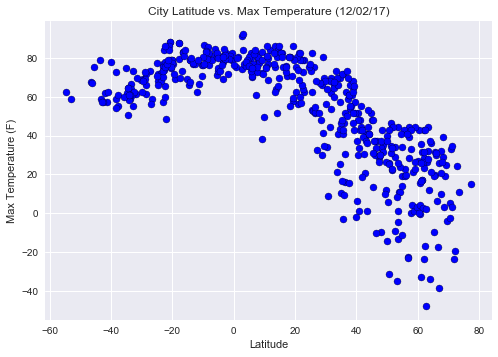

In [10]:
plt.scatter(weather_df['Lat'], weather_df['Max_Temp'],
           marker = 'o', facecolors='blue', 
           edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (12/02/17)')
plt.grid(True)
plt.savefig('CityLatvsMaxTemp.png')
plt.show()

## Latitude vs. Humidity Plot

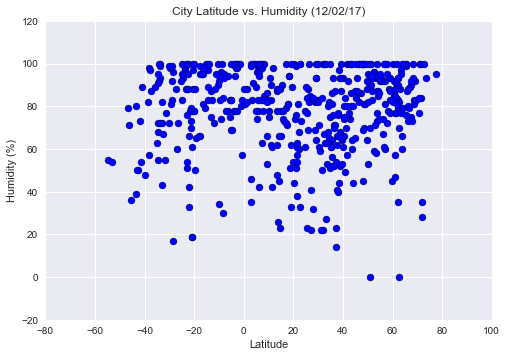

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'],
           marker = 'o', facecolors='blue', 
           edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (12/02/17)')
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid(True)
plt.savefig('CityLatvsHumidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

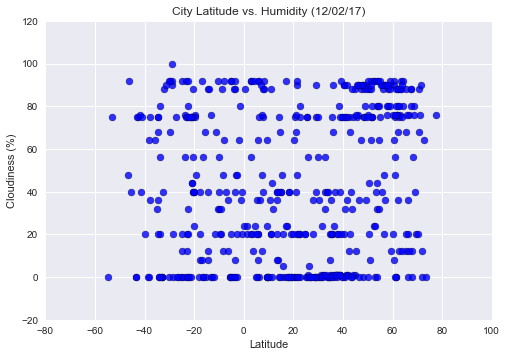

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],
           marker = 'o', facecolors='blue', 
           edgecolors='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Humidity (12/02/17)')
plt.xlim(-80, 100)
plt.ylim(-20, 120)
plt.grid(True)
plt.savefig('CityLatvsCloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

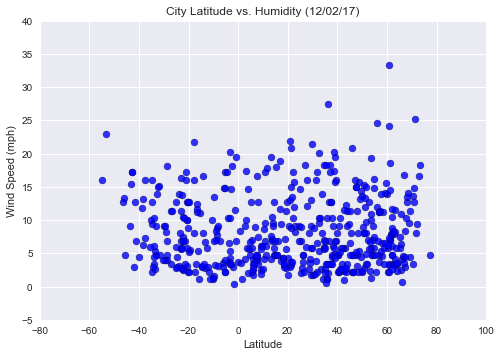

In [13]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],
           marker = 'o', facecolors='blue', 
           edgecolors='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Humidity (12/02/17)')
plt.xlim(-80, 100)
plt.ylim(-5, 40)
plt.grid(True)
plt.savefig('CityLatvsWindSpeed.png')
plt.show()

In [14]:
# Save df as csv
weather_df.to_csv('MG_weather_df.csv', index=False)

## Analysis

### - One of the evident trends is that near latitude 0 (the equator), cities have a higher temperature.
### - Following up on the first point, humidity percentage is highest in between -20 and 0 degrees latitude.
### - Cities towards higher latitudes seem to have higher wind speeds. Especially between 50 and 80 degrees latitude.